In [1]:
# 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

%matplotlib inline

In [4]:
# 2. Load Cleaned Dataset
df = pd.read_excel("../data/clean/mymoviedb_cleaned.xlsx")
df.head()

,Title,Release_Date,Release_Year,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Primary_Genre
0,Spider-Man: No Way Home,2021-12-15,2021,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action,Adventure,ScienceFiction",Action
1,The Batman,2022-03-01,2022,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime,Mystery,Thriller",Crime
2,No Exit,2022-02-25,2022,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,Thriller
3,Encanto,2021-11-24,2021,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation,Comedy,Family,Fantasy",Animation
4,The King's Man,2021-12-22,2021,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action,Adventure,Thriller,War",Action


<br></br>
## 📊 BUSINESS QUESTION 1     
How Are Movie Ratings Distributed?

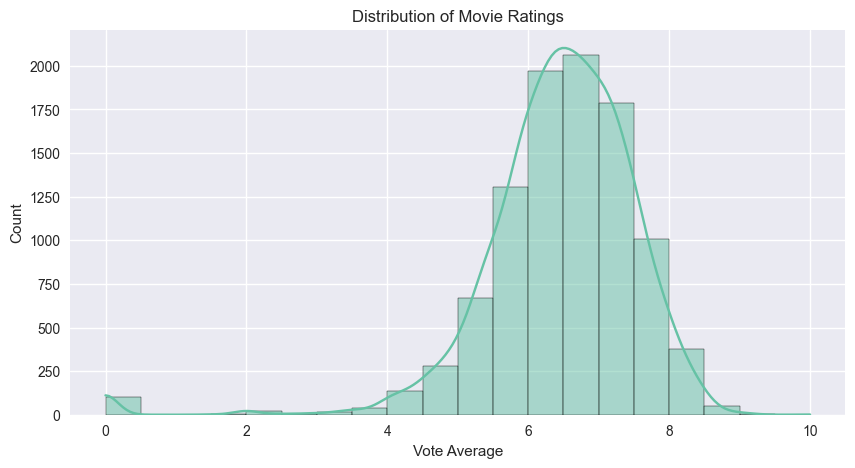

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df["Vote_Average"], bins=20, kde=True)

plt.title("Distribution of Movie Ratings")
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.show()

### 📌 Insight (Write in Markdown)
- Most movies are rated between 6 and 8.
- Very few movies have extremely low ratings.
- Distribution slightly left-skewed.

<br></br>
## 📊 BUSINESS QUESTION 2  
Which Genres Have Most Movies?

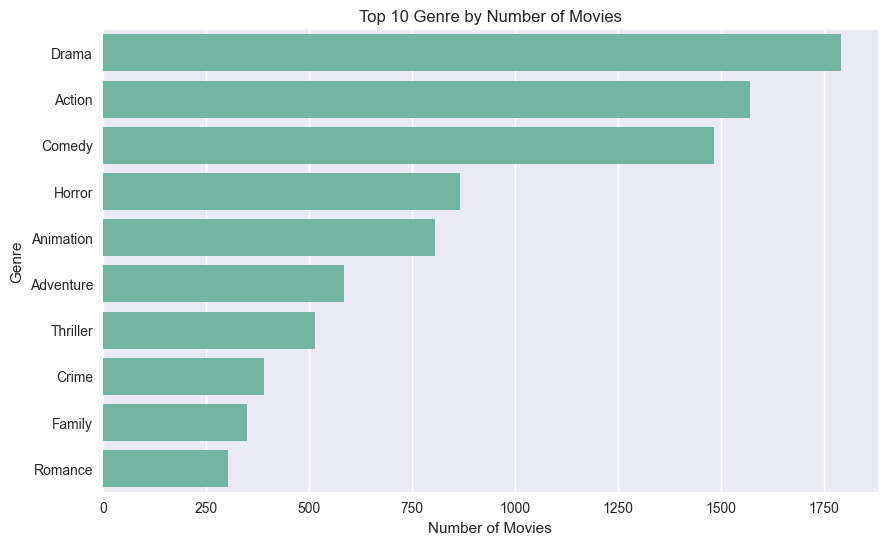

In [6]:
genre_counts = df["Primary_Genre"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)

plt.title("Top 10 Genre by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

### 📌 Insight
- Drama dominates content library.
- Comedy and Action follow.
- Platform content is genre-heavy in certain categories.

<br></br>
## 📊 BUSINESS QUESTION 3   
Which Genres Have Highest Average Rating?

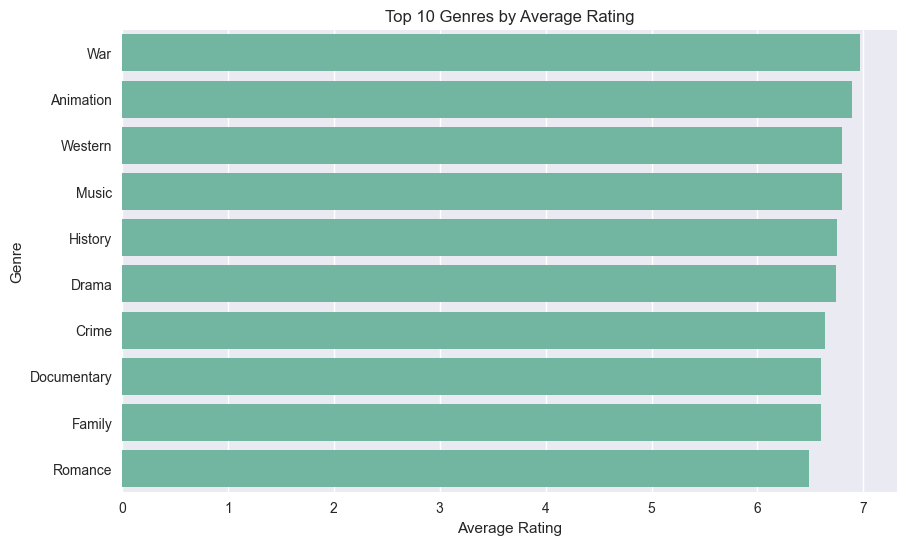

In [7]:
genre_rating = df.groupby("Primary_Genre")["Vote_Average"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_rating.values, y=genre_rating.index)

plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

### 📌 Insight
- Some niche genres may have higher quality scores.
- High quantity ≠ high quality.

<br></br>
## 📊 BUSINESS QUESTION 4  
Does Rating Influence Popularity?

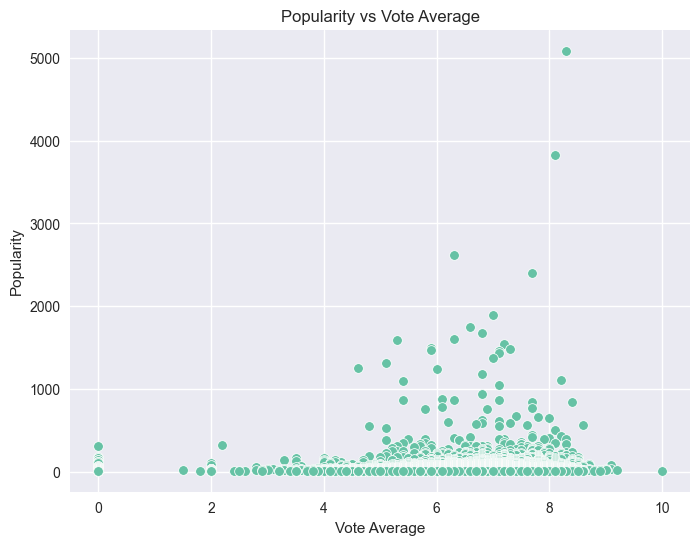

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Vote_Average", y="Popularity", data=df)

plt.title("Popularity vs Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Popularity")
plt.show()

### 📌 Insight
- Weak positive relationship.
- Popularity not solely dependent on rating.
- Marketing & exposure may influence popularity.

<br></br>
## 📊 BUSINESS QUESTION 5   
Movie Production Trend Over Time

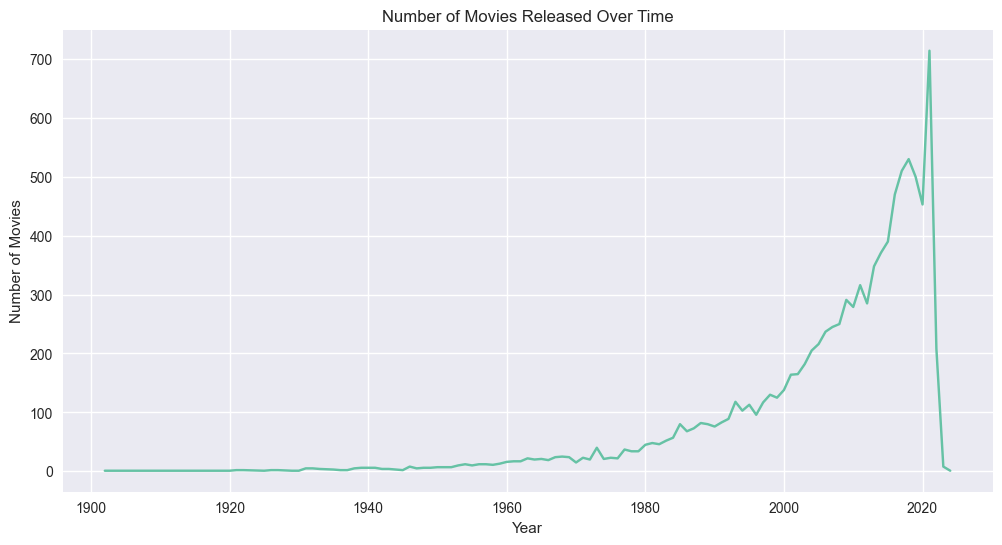

In [10]:
year_count = df["Release_Year"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=year_count.index, y=year_count.values)

plt.title("Number of Movies Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

### 📌 Insight
- Significant growth after 2000.
- Content explosion in recent decade.

<br></br>
## 📊 BUSINESS QUESTION 6   
Which Languages Dominate?

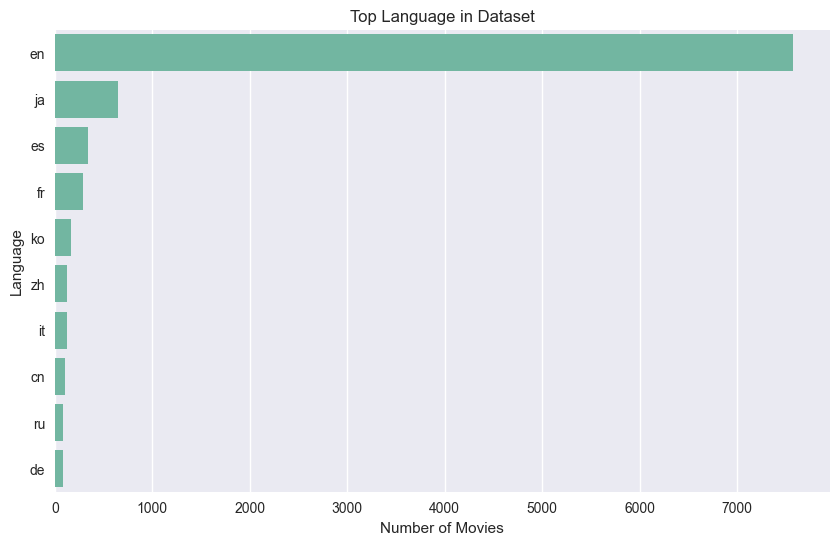

In [11]:
language_count = df["Original_Language"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=language_count.values, y=language_count.index)

plt.title("Top Language in Dataset")
plt.xlabel("Number of Movies")
plt.ylabel("Language")
plt.show()

### 📌 Insight
- English dominates.
- Few languages represent majority of content.

<br></br>
## 📊 BUSINESS QUESTION 7  
Correlation Between Numeric Variables

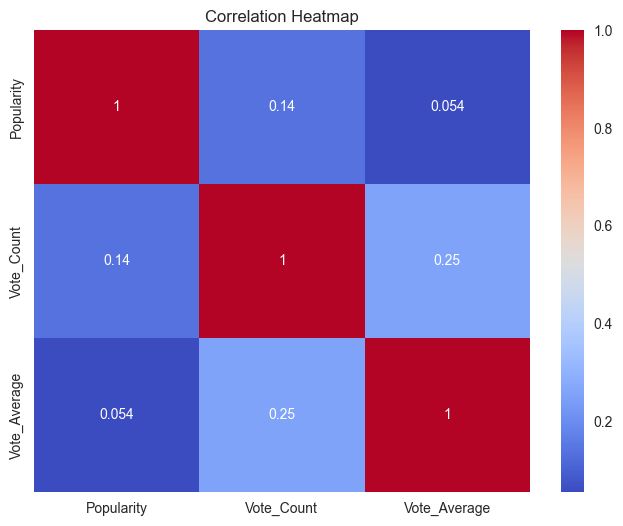

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Popularity','Vote_Count','Vote_Average']].corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

<br></br>
## Final Business Insights

1. Majority of movies fall between 6–8 rating range.
2. Drama, Comedy, and Action dominate content volume.
3. High-rated genres are not always the most produced.
4. Popularity is strongly influenced by vote count.
5. Content production has significantly increased over time.
6. English is the dominant language.
7. Quality alone does not guarantee popularity.